In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [25]:
# Load the dataset
data = pd.read_csv('fraudTrain.csv', usecols=['merchant', 'category', 'amt', 'gender', 'is_fraud'])

In [26]:
data = pd.get_dummies(data, columns=['merchant', 'category', 'gender'])


In [27]:
# Split the data into features and target
X = data.drop(columns=['is_fraud'])
y = data['is_fraud']

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [40]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [41]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)



Accuracy: 99.58%
Confusion Matrix:
 [[257271    544]
 [   553    967]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    257815
           1       0.64      0.64      0.64      1520

    accuracy                           1.00    259335
   macro avg       0.82      0.82      0.82    259335
weighted avg       1.00      1.00      1.00    259335



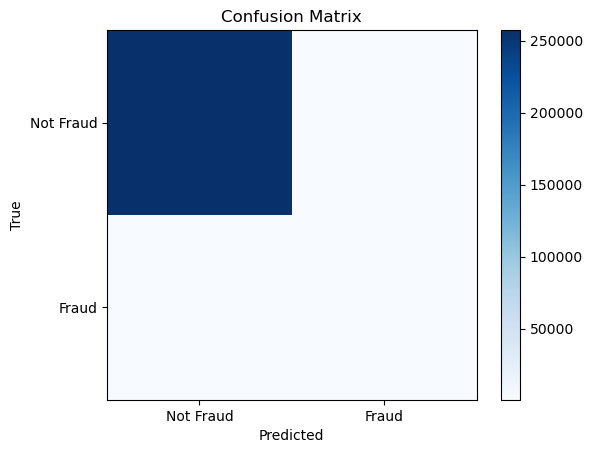

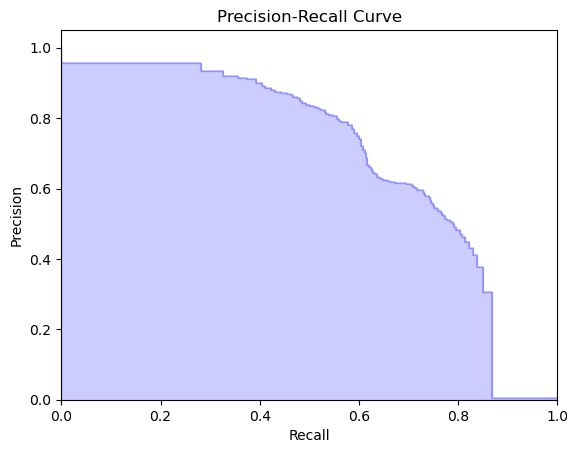

In [42]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, average_precision_score

# 1. Visualize the Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()
plt.xticks([0, 1], ["Not Fraud", "Fraud"])
plt.yticks([0, 1], ["Not Fraud", "Fraud"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# 3. Visualize the Precision-Recall Curve
y_score = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(y_test, y_score)

plt.figure()
plt.step(recall, precision, color='b', alpha=0.2, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall Curve')
plt.show()
